# A basic example of a full neural network (classification and regression)
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/ann_basics.ipynb)

This notebook provides a basic example of how to code a neural network for both classification and regression tasks using Keras and TensorFlow. 

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, odr
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (12.0 / 2.5, 8.0 / 2.5)

In [2]:
# random numbers
RNG_SEED = 99
# get_ipython().run_line_magic("env", f"PYTHONHASHSEED={RNG_SEED}")
np.random.seed(RNG_SEED)
tf.random.set_seed(RNG_SEED)
tf.keras.utils.set_random_seed(RNG_SEED)

## Linear regression example

In [3]:
url = "https://github.com/chasinginfinity/ml-from-scratch/raw/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv"
data = pd.read_csv(url)
x = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, 1])
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

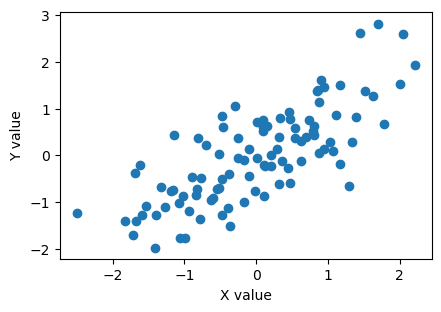

In [4]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

plt.scatter(x, y)
plt.xlabel("X value")
plt.ylabel("Y value")
plt.show()

In [5]:
'''This code using TensorFlow and Keras to build, compile, and train a simple neural network model for a regression task.

1. It starts by clearing the backend session of TensorFlow to ensure that no old models or layers are interfering with the current model.

2. It then defines a sequential model. Sequential models in Keras are linear stacks of layers where you can just keep adding layers to the stack.

3. A single dense layer with linear activation is added to the model. This is a fully connected layer, meaning all the neurons in the previous layer are connected to the neurons in this layer.

4. The model is compiled with the Adam optimizer, mean squared error as the loss function, and mean absolute error as the metric for evaluation.

5. The model's input shape is defined and the model summary is printed.

6. The data is split into training and validation sets using the train_test_split function from the sklearn library. The split is 80% training and 20% validation.

7. The model is then trained on the training data for 250 epochs with a batch size of 64. The validation data is also passed in to evaluate the model's performance on unseen data after each epoch.
'''

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(layers.Dense(1, activation="linear"))

model.compile(
    optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
    loss="mse",  # mean squared error
    metrics=["mae"],
)  # mean absolute error

model.build(input_shape=(None, 1))
print(model.summary())

# Split the data into training and validation sets.
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=12
)
print(f"{x_train.shape = }")
print(f"{y_train.shape = }")
print(f"{x_val.shape = }")
print(f"{y_val.shape = }")


# TRAIN THE MODEL

# x_train: training input
# y_train: training output
# epochs: number of times to run through the training data
# batch_size: number of samples to use in each training step
# verbose: controls the amount of output during training
# validation_data: data to use to validate the model
# shuffle: whether to shuffle the data before each epoch

history = model.fit(
    x_train,
    y_train,
    epochs=250,
    batch_size=64,
    verbose=0,
    validation_data=(x_val, y_val),
    shuffle=True,
)
print("done training")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
x_train.shape = (79, 1)
y_train.shape = (79, 1)
x_val.shape = (20, 1)
y_val.shape = (20, 1)


2024-04-17 06:08:14.963545: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


done training


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


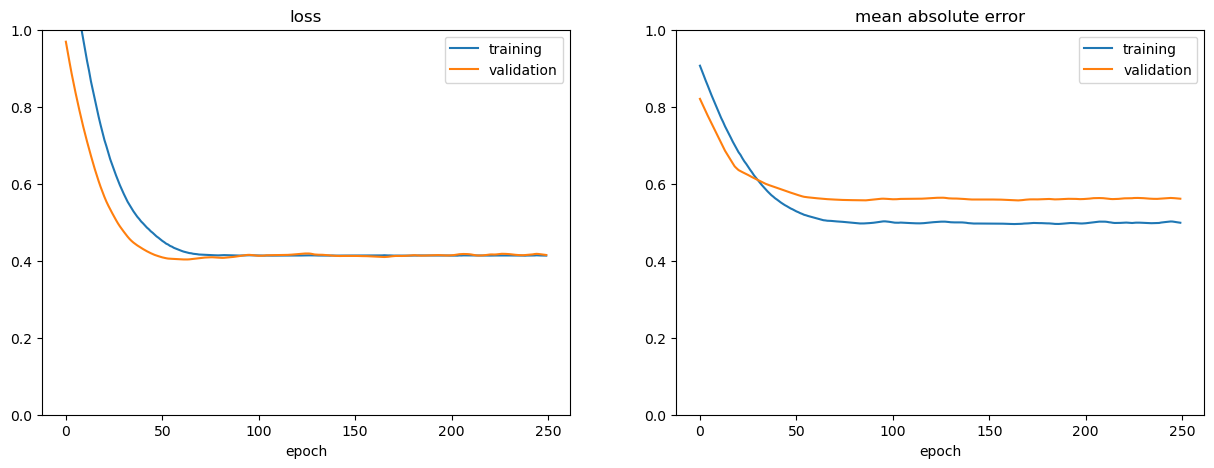

In [6]:
# from keras.callbacks import history
print(history.history.keys())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")
plt.title("loss")
plt.xlabel("epoch")
plt.legend()
plt.ylim(0, 1.0)

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="training")
plt.plot(history.history["val_mae"], label="validation")
plt.title("mean absolute error")
plt.xlabel("epoch")
plt.legend()
plt.ylim(0, 1.0)

plt.show()

4/4 [==============================] - 0s 578us/step


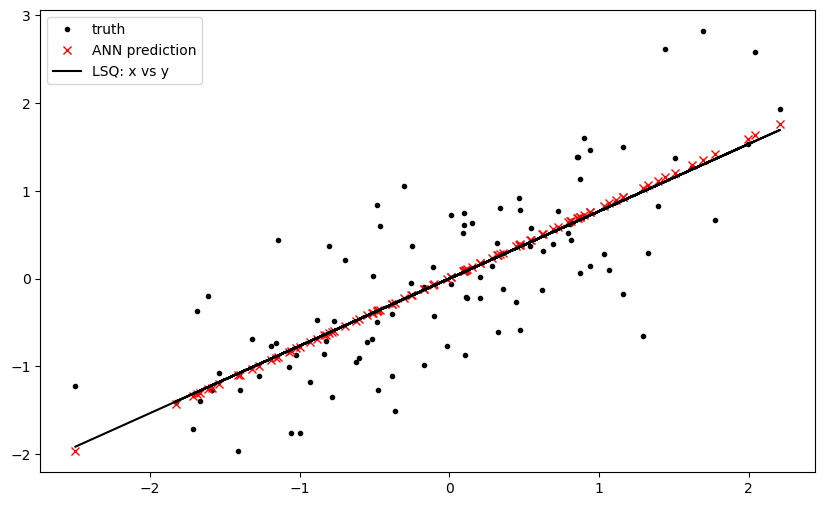

In [7]:
# output predictions based on input x
ypred = model.predict(x)

# plot predicted values
plt.figure(figsize=(10, 6))
plt.plot(x, y, ".", color="black", label="truth")
plt.plot(x, ypred, "x", color="red", label="ANN prediction")

slope, intercept, r_value, p_value, std_err = stats.linregress(
    np.squeeze(x), np.squeeze(y)
)
plt.plot(x, intercept + x * slope, "-", color="black", label="LSQ: x vs y")
plt.legend()

# plt.ylim(0,120)
# plt.xlim(0,120)

plt.show()

# A non-linear, more interesting example

In [8]:
# MODIFY: define a function to be estimated
def my_function(x):
    return np.round(np.sin(1.15 * x * np.pi))

    # return np.abs(np.sin(x * np.pi/2))         # MODIFY: uncomment for another interesting function to use
    # return np.sin(x * np.pi/2)                 # MODIFY: uncomment for another interesting function to use

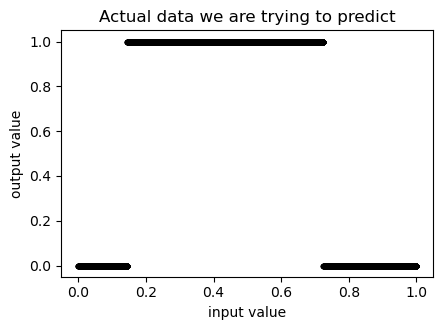

In [9]:
# make some "truth" data
# generate lots of sample pairs (x, f(x))

n_samples = 10000
x = np.random.random((n_samples, 1))
y = my_function(x)

# plot the (x,y) pairs.
plt.figure()
plt.plot(x, y, ".", color="black")
plt.title("Actual data we are trying to predict")
plt.xlabel("input value")
plt.ylabel("output value")
plt.show()

Activation Functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations

Common choices include:
* relu
* sigmoid
* tanh

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
done training
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


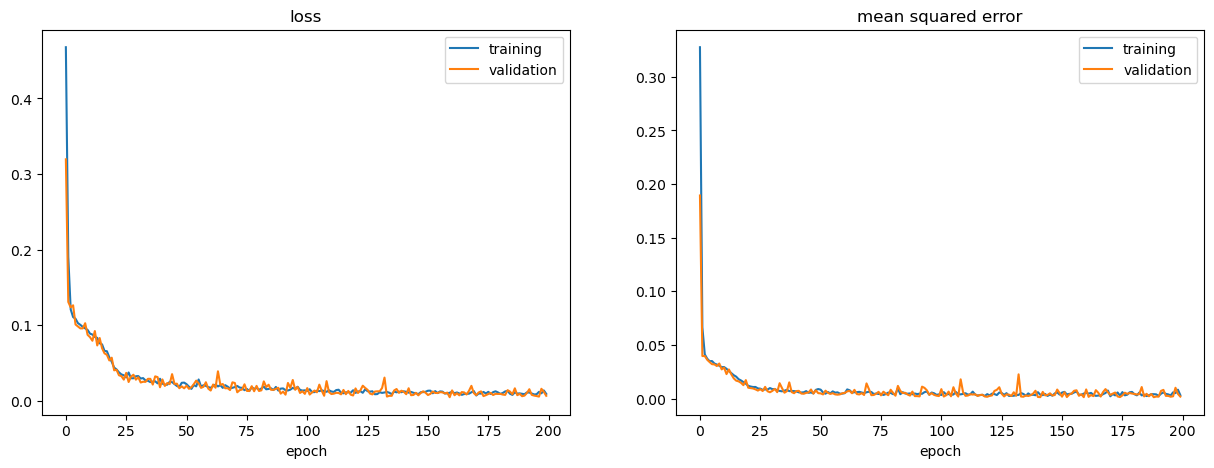

In [10]:
# Example: build a simple, fully-connected network
# (aka multi-layer perceptron).
# Nodes of each layer are connected to all nodes of the next layer.

# In Keras a NN model is built in layers.
# Most common type is sequential layers - one layer after the other with
# connections only between neighboring layers.
# -----------------------------------------

# MODIFY: number of units in each layer; add more units for more layers, e.g. [16, 16, 16]
layer_units = [16, 16]

# MODIFY: activation function, e.g. "relu", "sigmoid", "tanh", "linear"
activation = (
    "relu"
)

# MODIFY: run through all training data that many times. Order gets shuffled.
n_epochs = (
    200
)

# MODIFY: how much to update weights for each batch
learning_rate = 0.01

# MODIFY: train on batches (chunks) of samples
batch_size = 128

# -----------------------------------------
# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# First hidden layer: densely-connected layer with
# n_units units and activation function 'relu'.
for n_units in layer_units:
    model.add(layers.Dense(n_units, activation=activation))

# final layer:  just 1 node and no activation function
model.add(layers.Dense(1, activation=None))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),  # Adam optimizer
    loss="mae",  # mean absolute error = mae
    metrics=["mse"],
)  # mean squared error = mse

model.build(input_shape=(None, 1))
print(model.summary())

# TRAIN THE MODEL

# x: training input
# y: training output
# epochs: number of times to run through the training data
# batch_size: number of samples to use in each training step
# verbose: controls the amount of output during training
# validation_data: data to use to validate the model
# shuffle: whether to shuffle the data before each epoch

history = model.fit(
    x,
    y,
    epochs=n_epochs,
    batch_size=batch_size,
    verbose=0,
    validation_split=0.2,
    shuffle=True,
)
print("done training")

# -----------------------------------------
# plot the loss during training
# -----------------------------------------
# from keras.callbacks import history
print(history.history.keys())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")
plt.title("loss")
plt.xlabel("epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["mse"], label="training")
plt.plot(history.history["val_mse"], label="validation")
plt.title("mean squared error")
plt.xlabel("epoch")
plt.legend()

plt.show()

4/4 [==============================] - 0s 512us/step


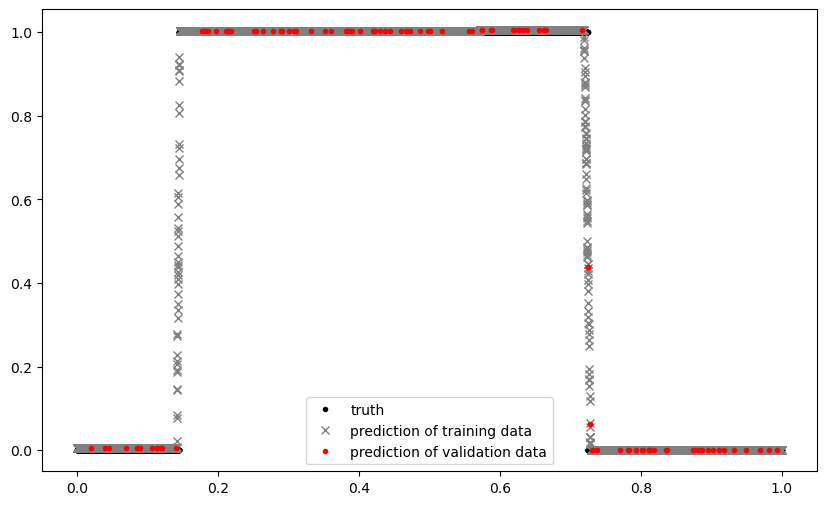

In [11]:
# make predictions with your model
ypred = model.predict(x)
# create new samples in x
px = np.random.random((100, 1))
# predict y
py = model.predict(px)

# plot predicted values
plt.figure(figsize=(10, 6))
plt.plot(x, y, ".", color="black", label="truth")
plt.plot(x, ypred, "x", color="gray", label="prediction of training data")
plt.plot(px, py, ".", color="red", label="prediction of validation data")
plt.legend()

# Same example, but now with classification instead

classes = [0 1]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
None
done training
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


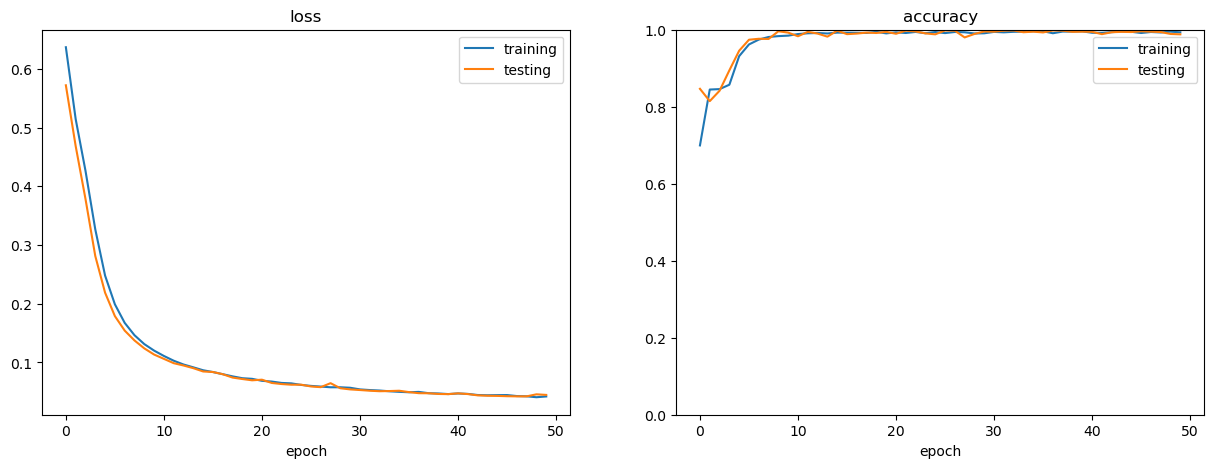

In [12]:
y_class = np.asarray(np.round(y), dtype="int")
num_classes = len(np.unique(y_class))
print("classes = " + str(np.unique(y_class)))

# MODIFY: number of units in each layer; add more units for more layers, e.g. [16, 16, 16]
layer_units = [16,]

# MODIFY: activation function, e.g. "relu", "sigmoid", "tanh", "linear"
activation = (
    "relu"
)

# MODIFY: run through all training data that many times. Order gets shuffled.
n_epochs = (
    50
)

# MODIFY: how much to update weights for each batch
learning_rate = 0.01

# MODIFY: train on batches (chunks) of samples
batch_size = 128

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# Input layer is defined later

for n_units in layer_units:
    model.add(layers.Dense(n_units, activation=activation))

# final layer:  just 1 node and no activation function
model.add(layers.Dense(num_classes, activation=None))

# normalize output to turn values into "likilihoods" that sum to 1.0
model.add(layers.Activation("softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),  # Adam optimizer
    loss="sparse_categorical_crossentropy",  # mean absolute error = mae
    metrics=["accuracy"],
)  # mean squared error = mse

model.build(input_shape=(None, 1))
print(model.summary())

# TRAIN THE MODEL

# x: training input
# y: training output
# epochs: number of times to run through the training data
# batch_size: number of samples to use in each training step
# verbose: controls the amount of output during training
# validation_data: data to use to validate the model
# shuffle: whether to shuffle the data before each epoch

history = model.fit(
    x,
    y_class,
    epochs=n_epochs,
    batch_size=batch_size,
    verbose=0,
    validation_split=0.2,
    shuffle=True,
)
print("done training")

# -----------------------------------------
# plot the loss during training
# -----------------------------------------
# from keras.callbacks import history
print(history.history.keys())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="testing")
plt.title("loss")
plt.xlabel("epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="testing")
plt.title("accuracy")
plt.ylim(0, 1)
plt.xlabel("epoch")
plt.legend()

plt.show()

4/4 [==============================] - 0s 571us/step


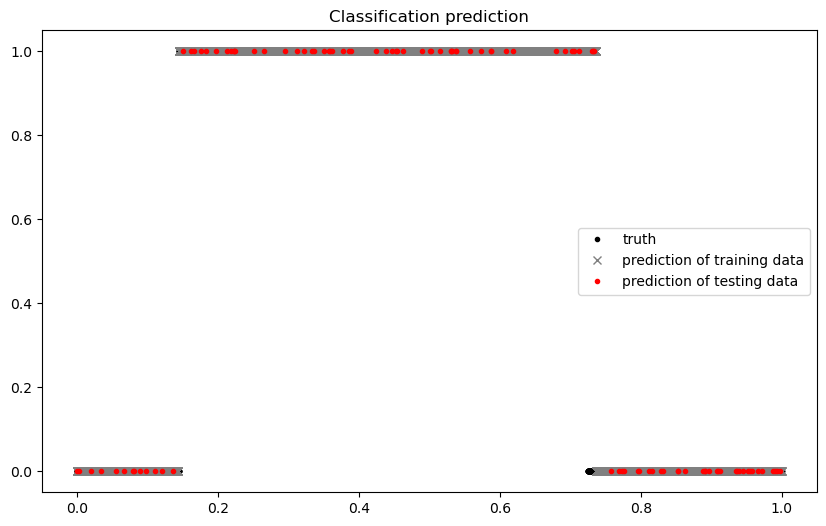

In [13]:
# MAKE PREDICTIONS

# predict the probability/likelihood of each class with your trained model
ypred = model.predict(
    x
)

# compute which class has the highest probability/likelihood
ypred_class = np.argmax(
    ypred, axis=1
)

# create new samples in x
px = np.random.random((100, 1))
# predict y
py_class = model.predict(px)
py = np.argmax(py_class, axis=1)

# plot predicted values
plt.figure(figsize=(10, 6))
plt.plot(x, y, ".", color="black", label="truth")
plt.plot(x, ypred_class, "x", color="gray", label="prediction of training data")
plt.plot(px, py, ".", color="red", label="prediction of testing data")
plt.legend()
plt.title("Classification prediction")
plt.show()

#### Let's look at one particular prediction output by the classifier ANN

In [14]:
print(f"prediction output shape = {ypred.shape}\n")
sample = 44

print(f"Sample = {sample}, True Class = {y_class[sample][-1]}, Predicted Class = {ypred_class[sample]}")
print(f"Prediction Likelihood [0] = {ypred[sample][0]:.5f}")
print(f"Prediction Likelihood [1] = {ypred[sample][1]:.5f}")

prediction output shape = (10000, 2)

Sample = 44, True Class = 0, Predicted Class = 0
Prediction Likelihood [0] = 0.99778
Prediction Likelihood [1] = 0.00222
